# Predicting Boston Housing Prices¶

 The notebook is using the Boston Housing Prices dataset, which contains information about homes located in Boston in 1978. The dataset includes 14 columns of information about each home, such as the number of rooms in the home, the crime rate in the neighborhood, and the distance to employment centers.

The goal of the notebook is to use this information to predict the median value of homes in each neighborhood. Because the target variable (median home value) is continuous, this is a regression task. Additionally, because the target variable is included in the dataset, this is a supervised learning task.

# Dataset Feature Overview

CRIM - per capita crime rate by town\
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.\
INDUS - proportion of non-retail business acres per town\
CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\
NOX - nitric oxides concentration (parts per 10 million)\
RM - average number of rooms per dwelling\
AGE - proportion of owner-occupied units built prior to 1940\
DIS - weighted distances to five Boston employment centres\
RAD - index of accessibility to radial highways\
TAX - full-value property-tax rate per $10,000\
PTRATIO - Pupil-techer ratio by town\
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\
LSTAT - % lower status of the population\
MEDV (TARGET) - Median value of owner-occupied homes in 1000's

### Import The Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

### Reading Data

In [2]:
# Reading Data
data = pd.read_csv("HousingData.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
data.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
422,12.04820,0.0,18.10,0.0,0.6140,5.648,87.6,1.9512,24,666,20.2,291.55,14.10,20.8
459,6.80117,0.0,18.10,0.0,0.7130,6.081,84.4,2.7175,24,666,20.2,396.90,14.70,20.0
504,0.10959,0.0,11.93,0.0,0.5730,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
83,0.03551,25.0,4.86,0.0,0.4260,6.167,46.7,5.4007,4,281,19.0,390.64,7.51,22.9
179,0.05780,0.0,2.46,0.0,0.4880,6.980,58.4,2.8290,3,193,17.8,396.90,5.04,37.2
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5,216,14.9,387.31,3.76,45.4
284,0.00906,90.0,2.97,0.0,0.4000,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,32.2
144,2.77974,0.0,19.58,0.0,0.8710,4.903,97.8,1.3459,5,403,14.7,396.90,29.29,11.8
317,0.24522,0.0,9.90,0.0,0.5440,5.782,71.7,4.0317,4,304,18.4,396.90,15.94,19.8


In [4]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### Exploratory Data Analysis (EDA)

EDA (Exploratory Data Analysis) is a process that involves understanding the data by calculating statistics and creating visualizations such as charts and figures. The purpose of EDA is to discover patterns, relationships, and anomalies in the data that could have an impact on our analysis.

In [5]:
data.shape

(506, 14)

This dataset has 506 rows (observations) and 14 columns (features) including our target variable MEDV. One thing to note right off the bat is the CHAS column is a binary variable and the RAD variable appears to be a categorical variable as well.

In [6]:
# Column Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution
data.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


In [8]:
# To check the number of unique values in each column
num_unique = data.nunique()
num_unique

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

In [9]:
# count the number of duplicate rows
data.duplicated().sum()

0

In [10]:
# count the number of missing values (NaN values) in each column.
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [11]:
# Calculate the correlation matrix
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


## Feature Engineering

In [12]:
#segrate the feature
numerical_features = [feature for feature in data.columns if data[feature].dtype!='O']
numerical_features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [13]:
data[numerical_features]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [14]:
# Create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='mean')

# Iterate over the numerical features and impute missing values with the mean
for feature in numerical_features:
    imputer.fit(data[[feature]])
    data[feature] = imputer.transform(data[[feature]])

In [15]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1.0,296.0,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2.0,242.0,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2.0,242.0,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3.0,222.0,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3.0,222.0,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1.0,273.0,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1.0,273.0,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1.0,273.0,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1.0,273.0,21.0,393.45,6.480000,22.0


## Visualization 

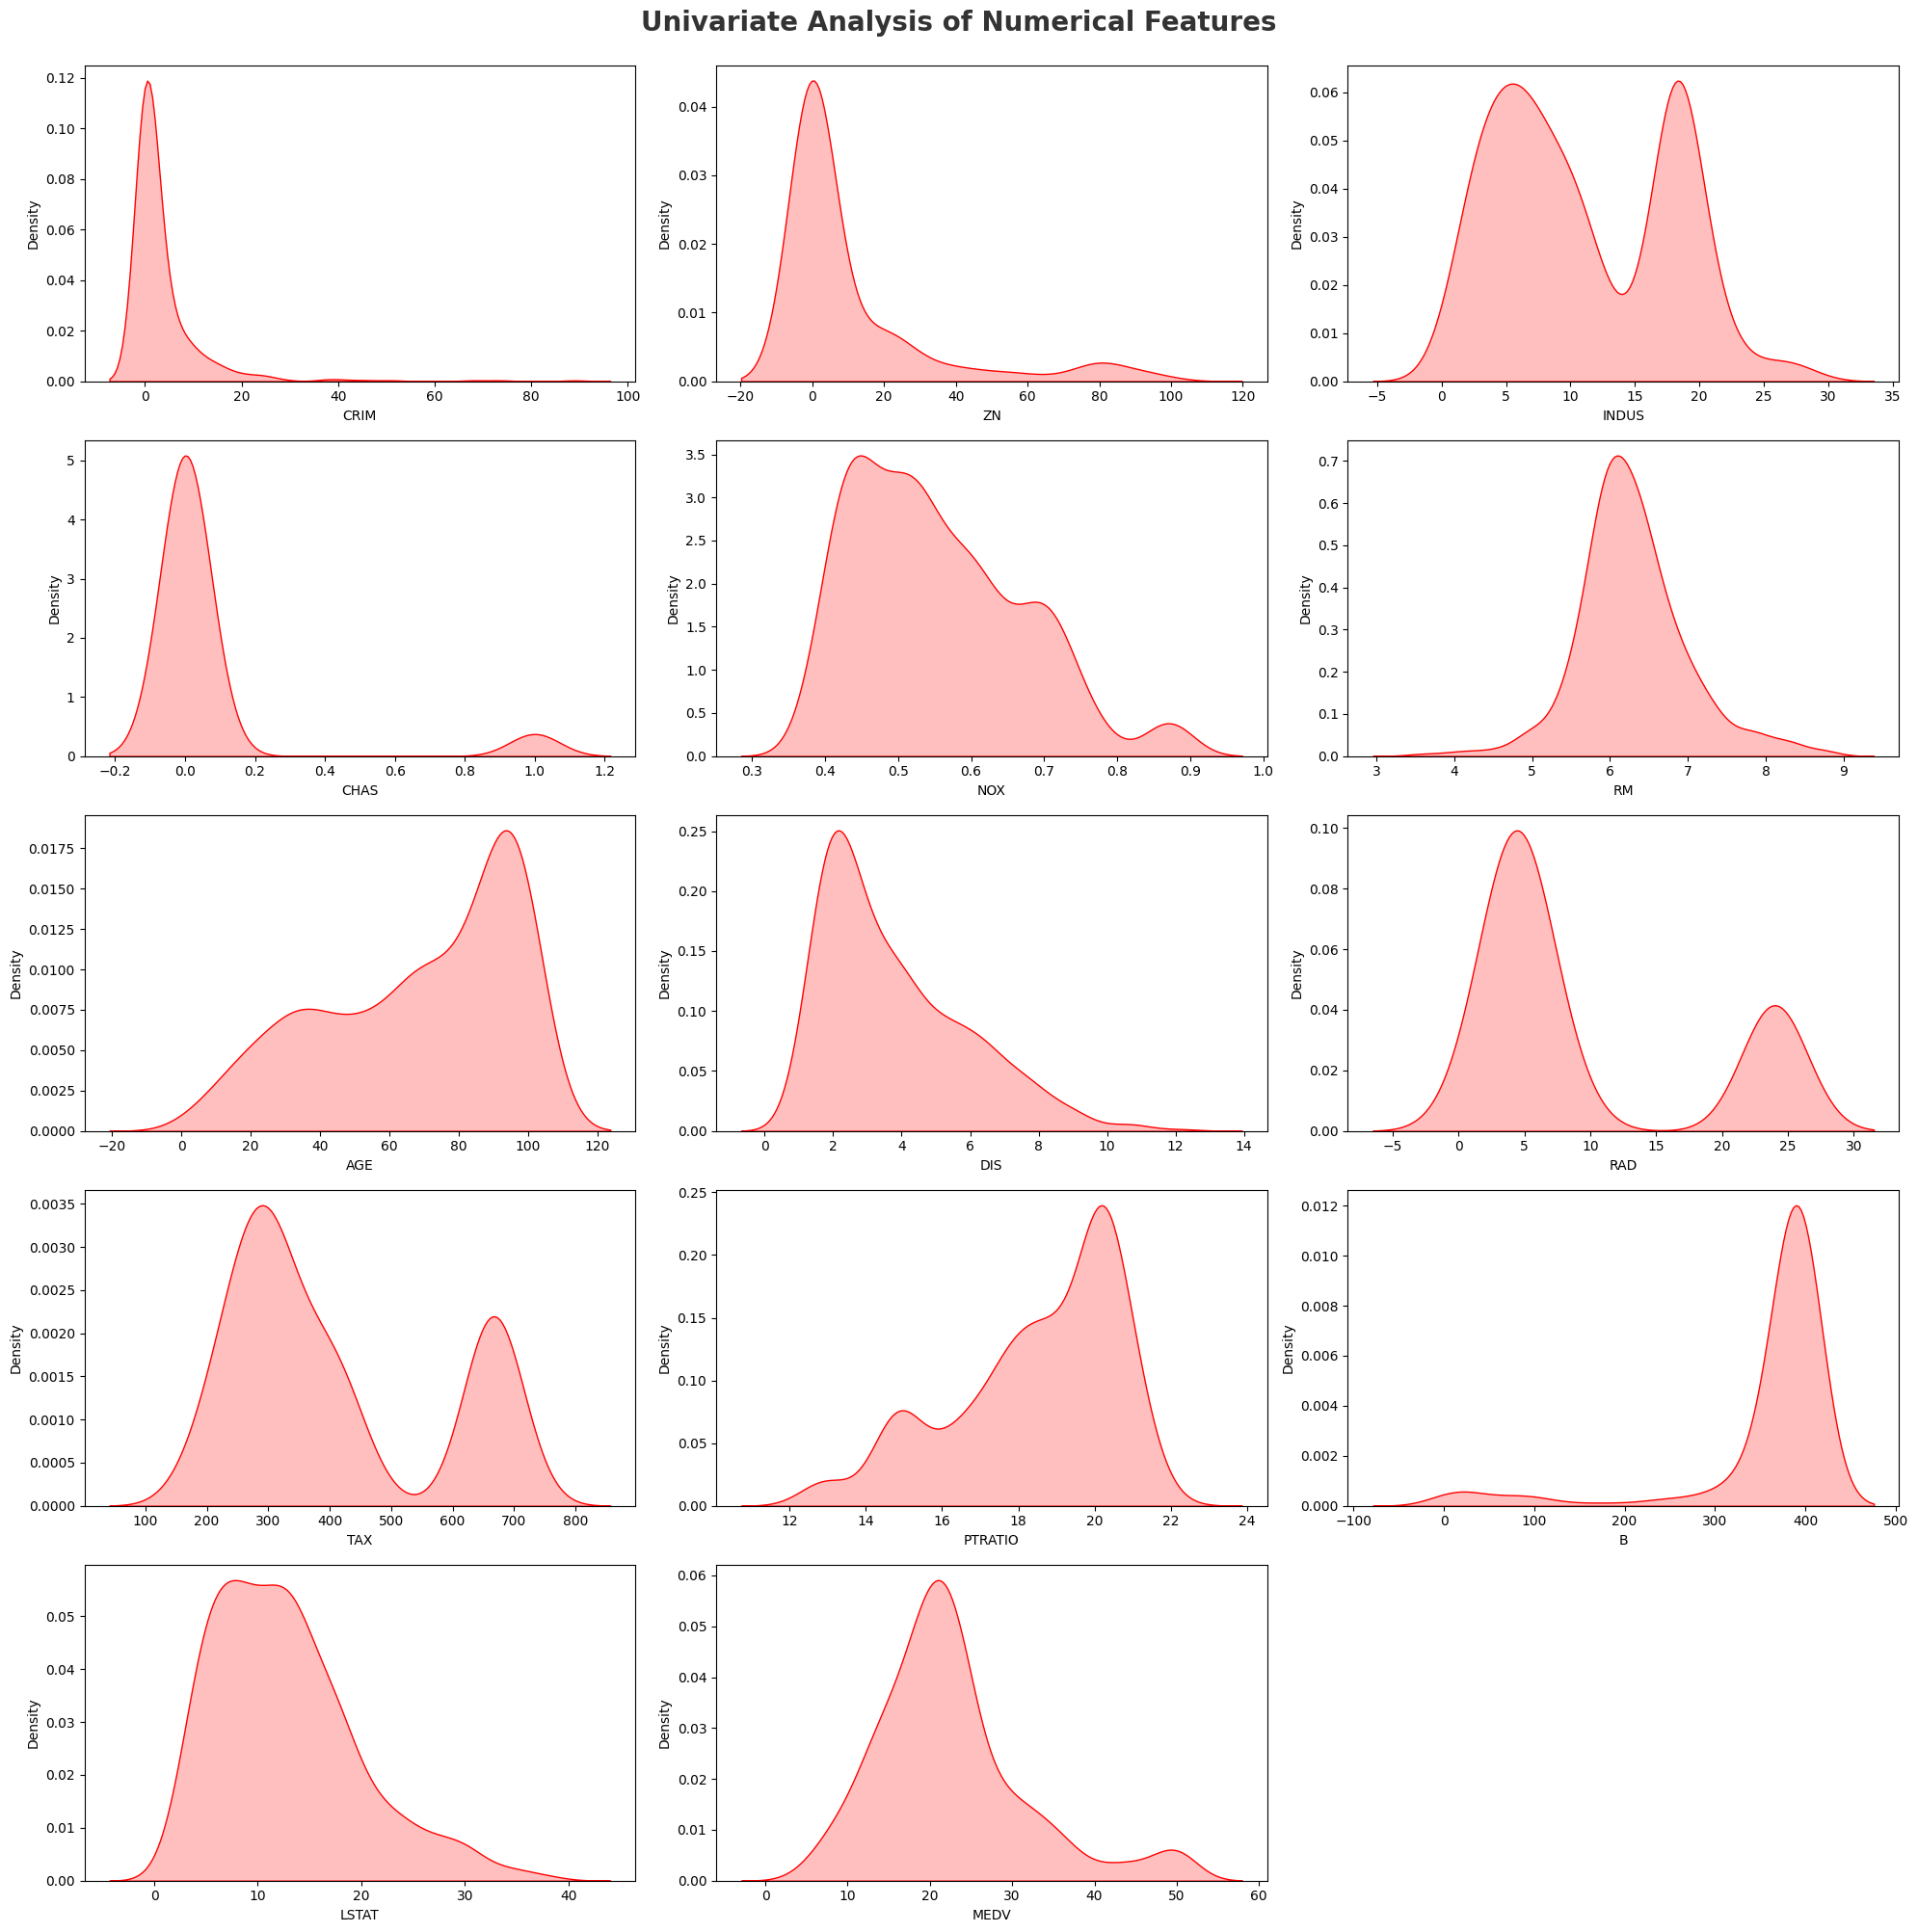

In [17]:
plt.figure(figsize=(20, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[numerical_features[i]],shade=True, color='r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

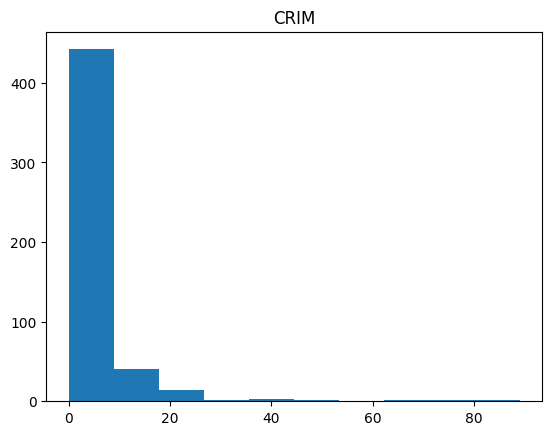

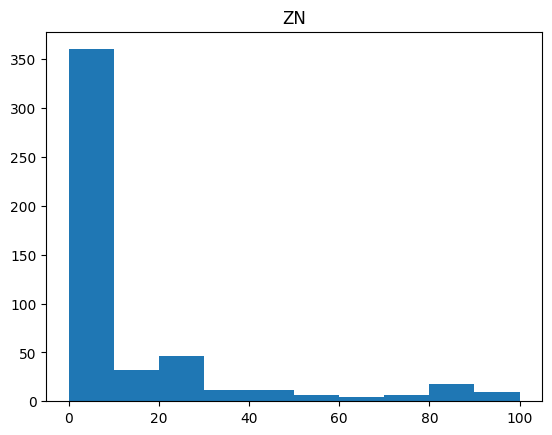

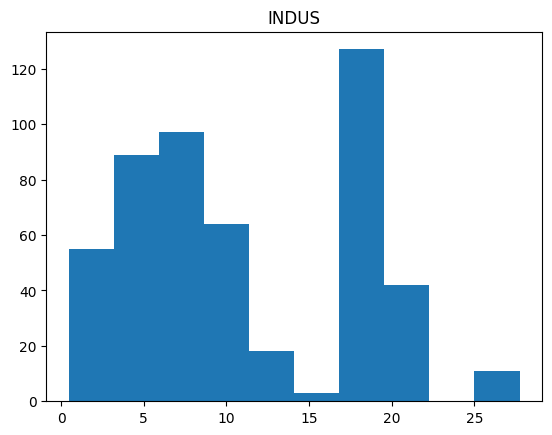

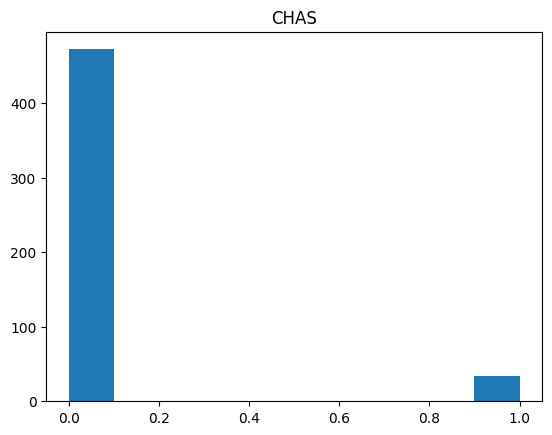

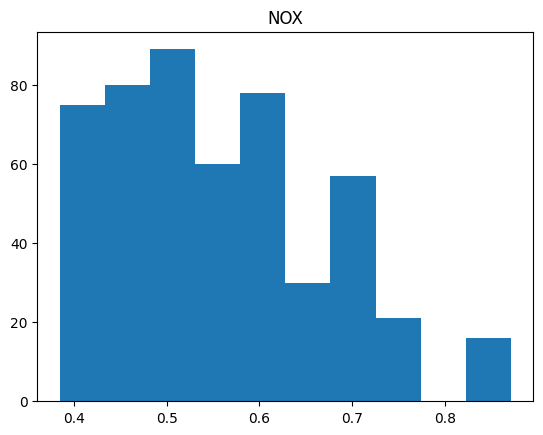

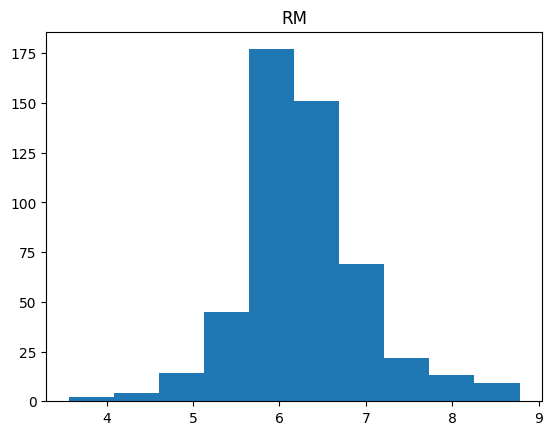

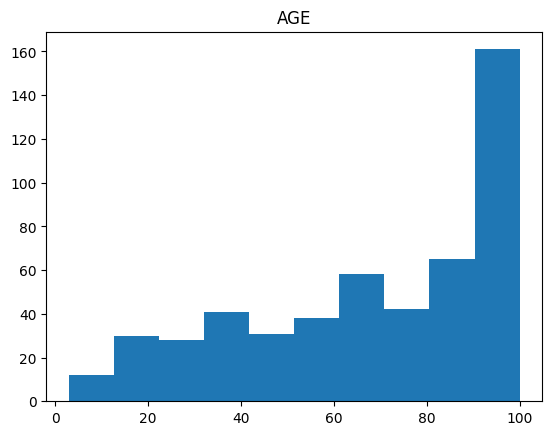

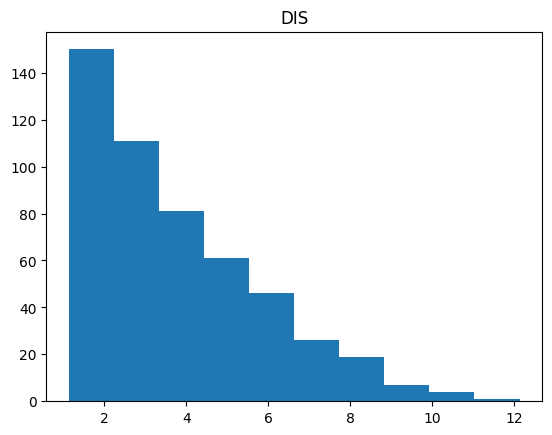

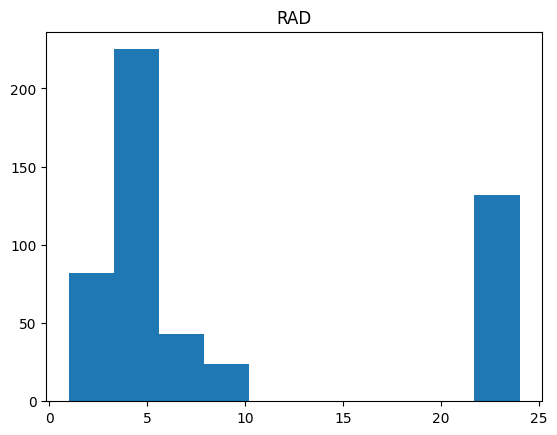

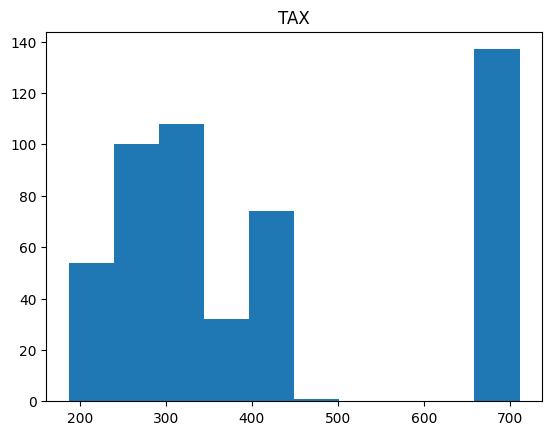

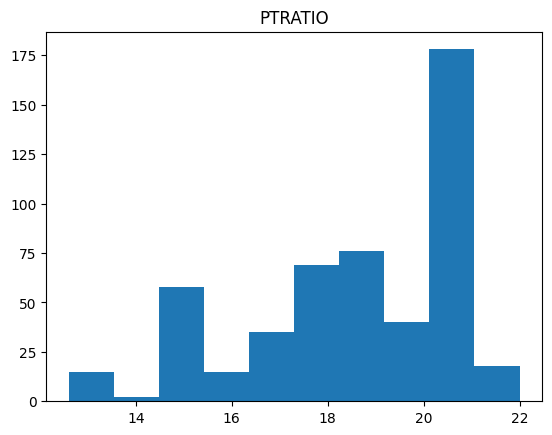

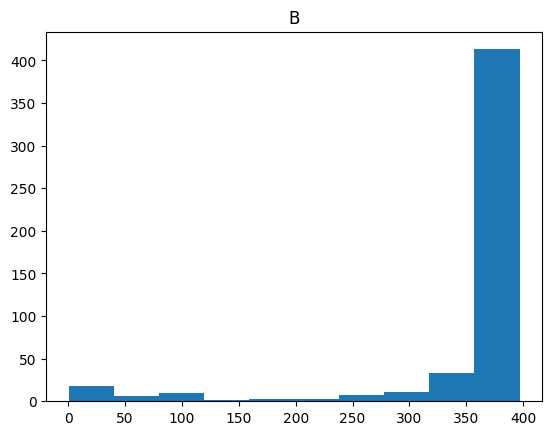

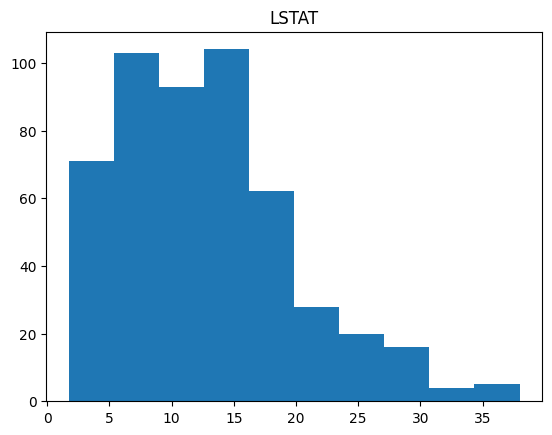

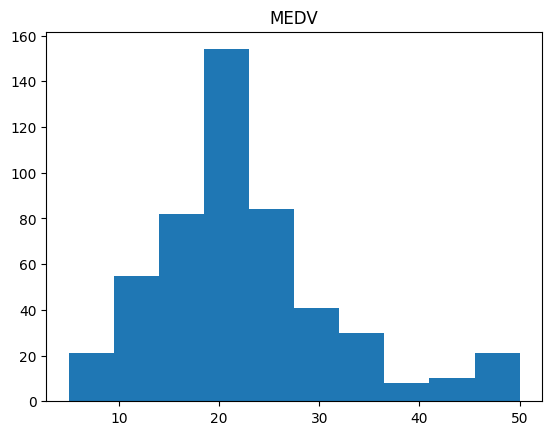

In [18]:
# histogram
for col in numerical_features:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(data[col]):
        # If the column is numeric, create a histogram using matplotlib
        plt.hist(data[col])
        plt.title(col)
        plt.show()

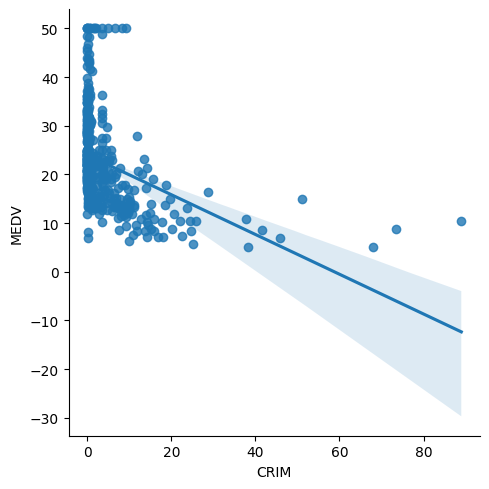

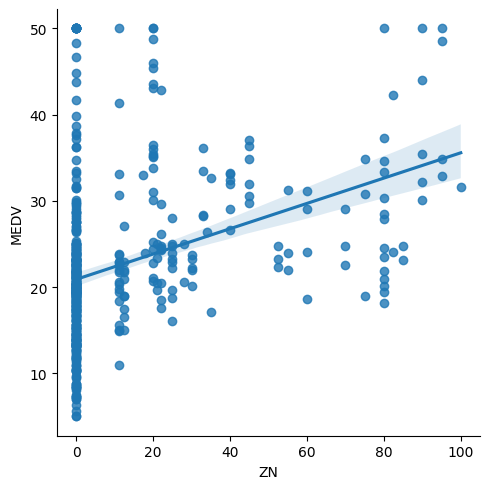

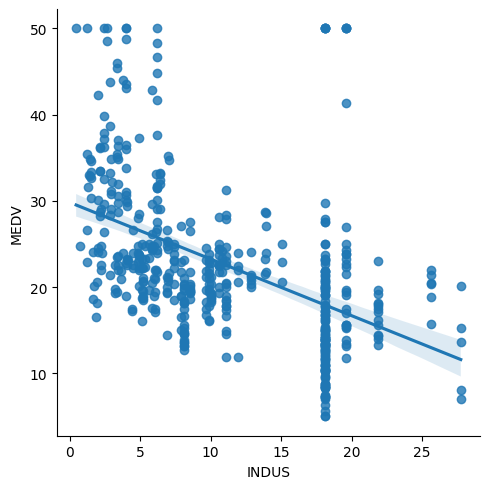

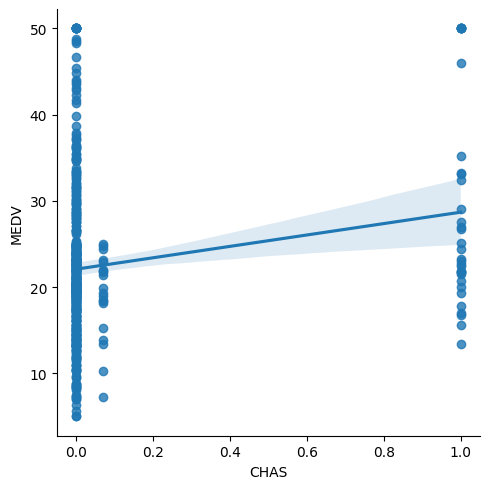

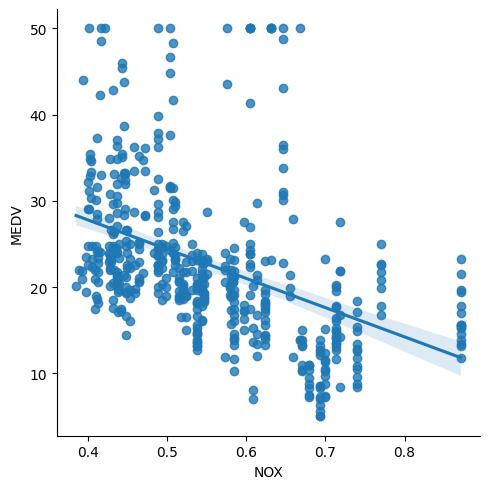

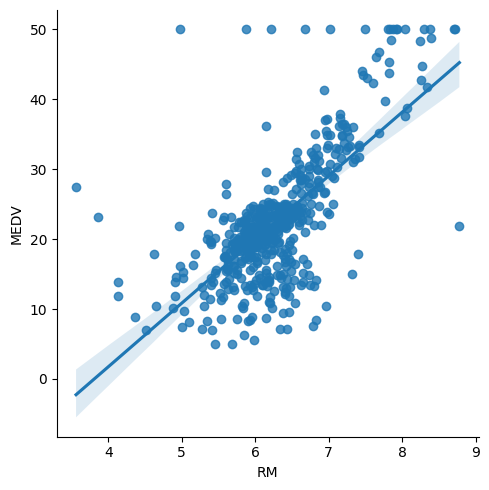

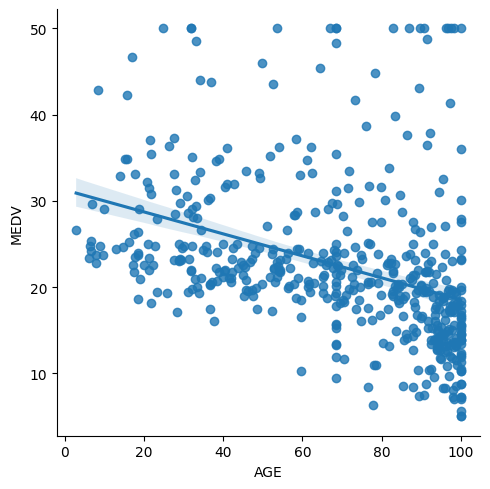

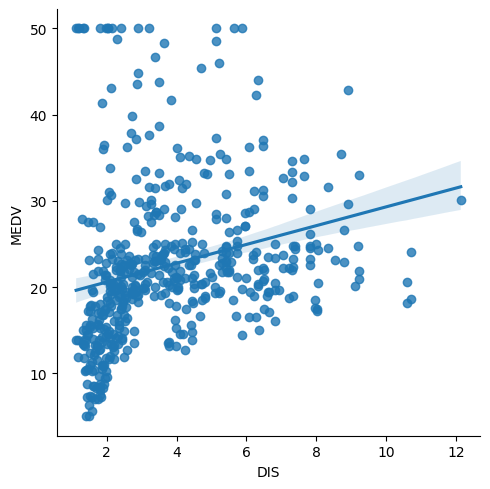

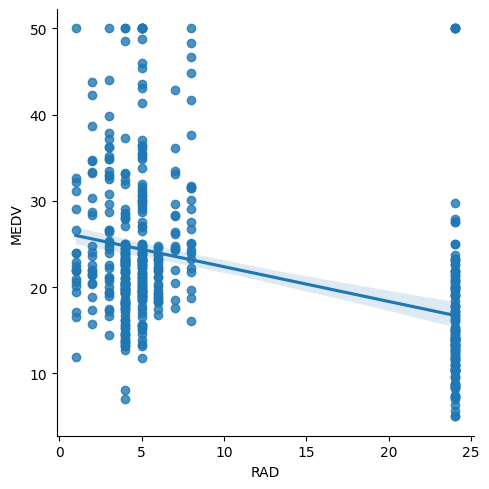

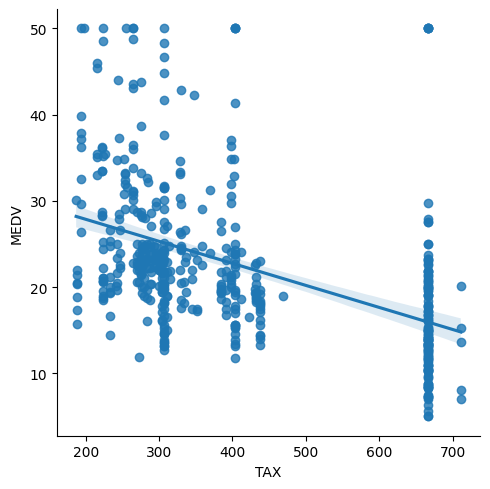

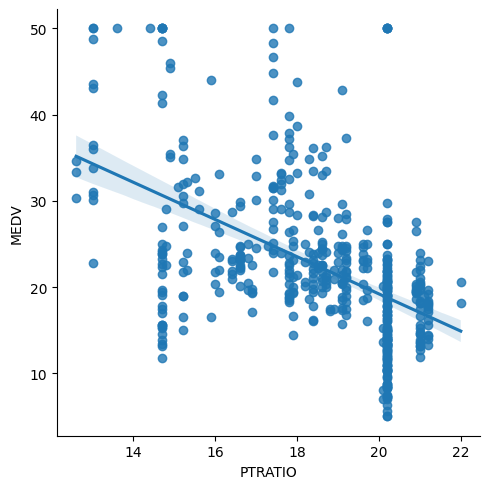

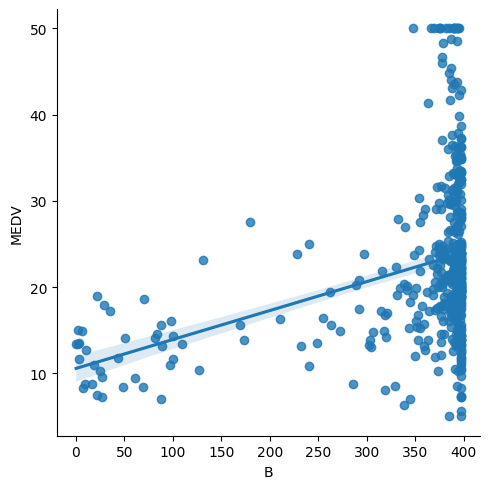

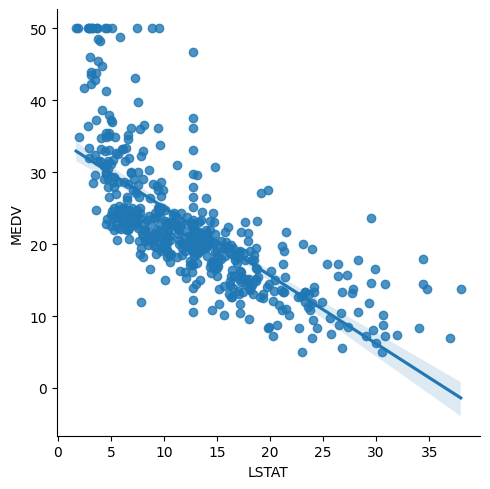

In [19]:
# lmplot, which is a function in the Seaborn library used to create linear regression plots. 
# A linear regression plot is a visualization of the relationship between two variables, 
# with a linear regression line fitted to the data. It can be useful for exploring the correlation between two variables and for making predictions.
for feature in numerical_features[:-1]:
    sns.lmplot(x=feature, y='MEDV', data=data)

<AxesSubplot:>

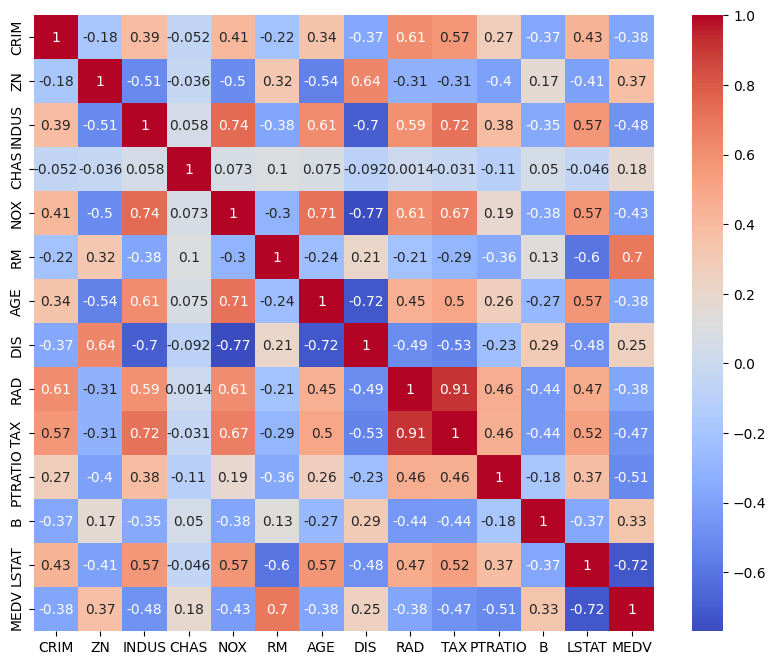

In [20]:
# Generate a correlation matrix
corr_matrix = data.corr()

# Create a larger figure
plt.figure(figsize=(10, 8))

# Create the heatmap with annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

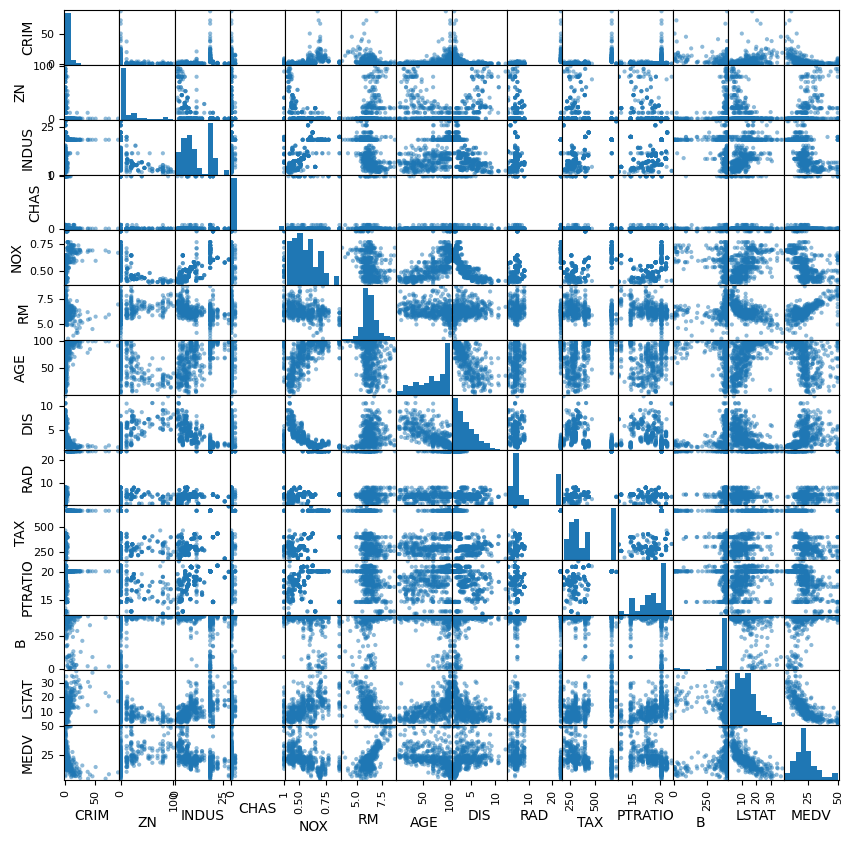

In [21]:
pd.plotting.scatter_matrix(data, figsize=(10, 10))
plt.show()

## Divide  the dataset into independent and dependent

In [22]:
X = data.drop('MEDV', axis=1)  # drop the target variable column from the input features
y = data['MEDV']

In [23]:
#splitting a dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=36)

## Scale The DataSet

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
scaler.fit(X_train)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Linear regression

In [26]:
# creates an instance of the LinearRegression class from a machine learning library
regression=LinearRegression()

In [27]:
# fits the linear regression model to the training data.
regression.fit(X_train,y_train)

LinearRegression()

In [28]:
# retrieves the coefficients of the fitted linear regression model.
regression.coef_

array([-0.76820938,  0.708996  , -0.40104223,  0.88864444, -1.65928084,
        2.76082005, -0.39953445, -3.03097852,  1.9980604 , -1.56368965,
       -1.90799184,  0.94283563, -3.55200591])

In [29]:
#  intercept or the y-intercept of a regression model
regression.intercept_

22.44896755162242

In [30]:
## prediction
y_pred=regression.predict(X_test)

In [31]:
# These functions are commonly used to evaluate the performance of regression models.
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

22.99829616104178
3.3716816582522324
4.7956538825317425


In [32]:
# Accuracy r2 and adjusted r square
score=r2_score(y_test,y_pred)
score

0.7335443404488459

In [33]:
#display adjusted R-squared
1 - (1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)

0.7265038453794048

### ridge

In [34]:
#creates an instance of the Ridge regression model
ridge=Ridge(alpha=20.0)

In [35]:
# fits the ridge regression model to the training data.
ridge.fit(X_train,y_train)

Ridge(alpha=20.0)

In [36]:
#prediction
y_pred=ridge.predict(X_test)

In [37]:
# These functions are commonly used to evaluate the performance of regression models.
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

23.566104984917118
3.381629893881222
4.854493277873306


### lasso

In [38]:
#creates an instance of the Lasso regression model
lasso=Lasso(alpha=20.0)

In [39]:
# fits the lasso regression model to the training data.
lasso.fit(X_train,y_train)

Lasso(alpha=20.0)

In [40]:
#prediction
y_pred=lasso.predict(X_test)

In [41]:
# These functions are commonly used to evaluate the performance of regression models.
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

86.37643664611677
6.5371593096991845
9.293892437838775


### ElasticNet

In [42]:
#creates an instance of the ElasticNet regression model
elasticnet=ElasticNet(alpha=20.0)

In [43]:
# fits the ElasticNet regression model to the training data.
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=20.0)

In [44]:
#prediction
y_pred=elasticnet.predict(X_test)

In [45]:
# These functions are commonly used to evaluate the performance of regression models.
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

86.37643664611677
6.5371593096991845
9.293892437838775


## Thank You